In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
# visual style for plots in seaborn
sns.set(style="whitegrid")
# declutter warnings
warnings.filterwarnings("ignore")

In [3]:
# load data, 100,000 rows because of performance
data = pd.read_csv('../data/raw/TWOSIDES.csv', nrows=1000000, low_memory=False)
print(f"Rows: {data.shape[0]}\ncolumns: {data.shape[1]}\n")
print(f"Column data types:\n{data.dtypes}\n")
print(f"Null values:\n{data.isnull().sum()}\n")
print(f"First 5 rows:\n{data.head()}\n")

Rows: 1000000
columns: 13

Column data types:
drug_1_rxnorn_id            object
drug_1_concept_name         object
drug_2_rxnorm_id            object
drug_2_concept_name         object
condition_meddra_id         object
condition_concept_name      object
A                           object
B                           object
C                           object
D                           object
PRR                         object
PRR_error                   object
mean_reporting_frequency    object
dtype: object

Null values:
drug_1_rxnorn_id            0
drug_1_concept_name         0
drug_2_rxnorm_id            0
drug_2_concept_name         0
condition_meddra_id         0
condition_concept_name      0
A                           0
B                           0
C                           0
D                           0
PRR                         0
PRR_error                   0
mean_reporting_frequency    0
dtype: int64

First 5 rows:
  drug_1_rxnorn_id       drug_1_concept_name drug_2_r

In [4]:
# Get rid of unnecessary columns and rename columns
data = data.rename(columns={
    'drug_1_concept_name': 'drug_1',
    'drug_2_concept_name': 'drug_2',
    'condition_concept_name': 'condition'
})
data_subset = data[['drug_1','drug_2', 'condition','PRR', 'PRR_error', 'mean_reporting_frequency']]
print(f"Rows: {data_subset.shape[0]}\ncolumns: {data_subset.shape[1]}\n")
print(f"Column data types:\n{data_subset.dtypes}\n")
print(f"First 5 rows:\n{data_subset.head()}\n")

Rows: 1000000
columns: 6

Column data types:
drug_1                      object
drug_2                      object
condition                   object
PRR                         object
PRR_error                   object
mean_reporting_frequency    object
dtype: object

First 5 rows:
                     drug_1              drug_2   condition       PRR  \
0                 Temazepam          sildenafil  Arthralgia   2.91667   
1                Bumetanide            Oxytocin  Arthralgia       5.0   
2  POLYETHYLENE GLYCOL 3350  Hydroxychloroquine  Arthralgia       3.0   
3                 Tamoxifen          Prednisone   Diarrhoea   5.14286   
4                 Temazepam          sildenafil   Diarrhoea  0.540541   

  PRR_error mean_reporting_frequency  
0  0.421275                0.0448718  
1   1.19224                0.0714286  
2  0.454505                0.0550459  
3  0.276271                  0.12766  
4  0.721093                0.0128205  



In [5]:
data_subset.describe()

,drug_1,drug_2,condition,PRR,PRR_error,mean_reporting_frequency
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,985,1079,8566,11930,150315,17890
top,Aspirin,Potassium Chloride,Nausea,10.0,1.37477,0.0909091
freq,20383,19526,3773,214881,1875,5043


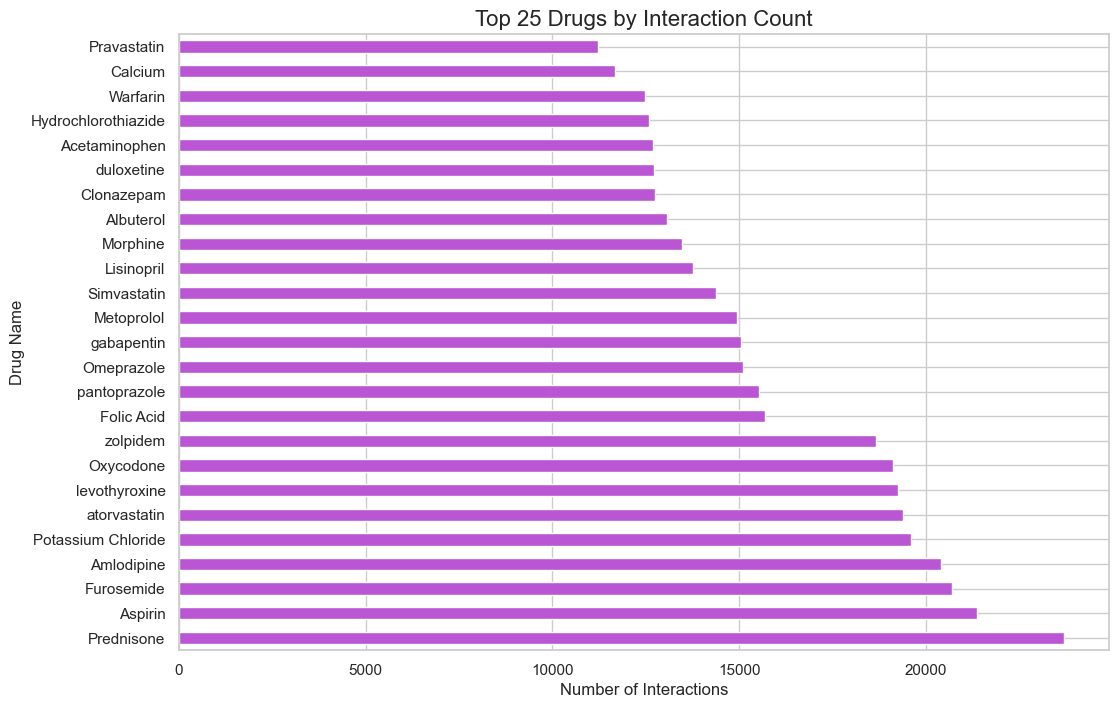

In [6]:
# find and graph the top 25 drugs by interaction count
drug_1_count = data['drug_1'].value_counts()
drug_2_count = data['drug_2'].value_counts()
total_drug_count = pd.concat([drug_1_count, drug_2_count]).groupby(level=0).sum()

plt.figure(figsize=(12, 8))
total_drug_count.nlargest(25).plot(kind='barh', color='mediumorchid')
plt.xlabel('Number of Interactions', fontsize=12)
plt.ylabel('Drug Name', fontsize=12)
plt.title('Top 25 Drugs by Interaction Count', fontsize=16)
plt.savefig('../models/top_drugs_by_interaction.png')
plt.show()

In [12]:
# Summary Table

# least interactive drugs is a header: quick clean
data = data[(data['drug_1'] != 'drug_1_name') & (data['drug_2'] != 'drug_2_name')].copy()

drug_1_count = data['drug_1'].value_counts()
drug_2_count = data['drug_2'].value_counts()
total_drug_count = pd.concat([drug_1_count, drug_2_count]).groupby(level=0).sum()

stats = {
    'Total Drug Pairs': len(data),
    'Unique Drugs': len(total_drug_count),
    'Mean Interactions per Drug': f"{total_drug_count.mean():.2f}",
    'Median Interactions per Drug': f"{total_drug_count.median():.0f}",
    'Max Interactions (Single Drug)': total_drug_count.max(),
    'Most Interactive Drug': total_drug_count.idxmax(),
    'Min Interactions (Single Drug)': total_drug_count.min(),
    'Least Interactive Drug': total_drug_count.idxmin()
}

for key, value in stats.items():
    print(f"{key}: {value}")


Total Drug Pairs: 999999
Unique Drugs: 1317
Mean Interactions per Drug: 1518.60
Median Interactions per Drug: 363
Max Interactions (Single Drug): 23703
Most Interactive Drug: Prednisone
Min Interactions (Single Drug): 1
Least Interactive Drug: Amodiaquine
